# Kernel substitution and SVM

In [1]:
import numpy as np
import sklearn
from functools import partial
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib as mpl

print("scikit-learn=={}".format(sklearn.__version__))
print("numpy=={}".format(np.__version__))
print("matplotlib=={}".format(mpl.__version__))

scikit-learn==0.22.2.post1
numpy==1.18.1
matplotlib==3.2.0


## Overview


This tutorial gives an introduction to Support Vector Machine for binary classification.
We will study the influence of the choice of the kernel on the performance of both the training set and the testing set.
We will see a concrete example of overfitting, how it can be fixed using some hyperparameters of the SVM, and why we sometimes need automatics tools to search the optimal hyper-parameters.
The idea is to introduce a first simple classification problem before embarking on more complicated problems in the rest of the tutorials.

## Extra assignment:
After this notebook has been completed (tasks 1-3), we encourage the students to download and try the SVM classification on a different dataset.

For instance, the [lfw_pair](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.lfw_pair) dataset:

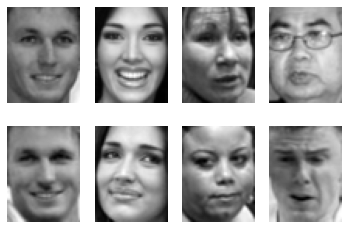

In [2]:
import plot_lfw
plot_lfw.plot_lfw()

In this tutorial however, we will work on the breast cancer [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) from the sklearn python library.

# Download and investigate the dataset

In [3]:
# Get the dataset
data = load_breast_cancer()
# Extract the samples
X = data.data
# Extract the targets
y = data.target

print("Number of samples:", X.shape[0])
print("Number of dimensions (descriptors):", X.shape[1])

Number of samples: 569
Number of dimensions (descriptors): 30


Each sample of the dataset consists in 30 medical descriptors of a mamography image.

In [4]:
print("----Feature names----")
print(data.feature_names)

----Feature names----
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


The target associated with each sample is binary and corresponds to whether the sample describs a benign or a malignant tumor.

In [5]:
print("----Target names----")
print(data.target_names)

----Target names----
['malignant' 'benign']


This defines a binary classification problem which we will handle using linear and non-linear Support Vector Machines.

First, we split the dataset randomly into a training and a testing dataset.
We choose the test size to be 30% of the total number of samples.

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

# Implement the linear kernel function

Next we define the kernel function which we want to use.
- Task 1: Implement the function below which applies a linear kernel to two input datasets

In [7]:
# Task 1: Solution
def my_linear_kernel(X1, X2):
    """ Applies a linear kernel to two inputs datasets
    Given
        X1: (n1_samples,d) ndarray
        X2: (n2_samples,d) ndarray
    Returns
        (n1_samples,n2_samples) ndarray
    """
    return X1 @ X2.T


We can now test the kernel implementation using our binary classification task.
We will train the SVM model class available in the sklearn library with and without our custom kernel function.

In [8]:
# Model definitions
my_lin_svm = SVC(kernel=my_linear_kernel)
ref_lin_svm = SVC(kernel="linear")

# Model fit
my_lin_svm.fit(xtrain, ytrain)
ref_lin_svm.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Compare the performance of our linear kernel with a reference implementation
Now that the models are fit, we can evaluate the accuracy of both model to make sure that they are equal

In [9]:
# Model test
ytrain_mylin_pred = my_lin_svm.predict(xtrain)
ytrain_reflin_pred = ref_lin_svm.predict(xtrain)
ytest_mylin_pred = my_lin_svm.predict(xtest)
ytest_reflin_pred = ref_lin_svm.predict(xtest)

# Print the accuracies

print("my_linear_kernel: training accuracy ",accuracy_score(ytrain_mylin_pred, ytrain))
print("ref kernel: training accuracy ",accuracy_score(ytrain_reflin_pred, ytrain))
print()
print("my_linear_kernel: testing accuracy ",accuracy_score(ytest_mylin_pred, ytest))
print("ref kernel: testing accuracy ",accuracy_score(ytest_reflin_pred, ytest))

my_linear_kernel: training accuracy  0.9648351648351648
ref kernel: training accuracy  0.9648351648351648

my_linear_kernel: testing accuracy  0.9736842105263158
ref kernel: testing accuracy  0.9736842105263158


You should see that the training and test accuracies of both models are identical

- Note: you might observe that the testing accuracy is larger than the training accuracy,
    this may happen for certain models and datasets and is an unfortunate random drawing events

# Improve the classification performance with an RBF kernel

In the example above, we see that the training accuracies are not 100% which means that the model does not learn the training set perfectly. This can be due to non-linearities that the linear SVM does not model well.
To remedy this, we implement a rbf kernel function.
- Task 2: Implement the function below which applies a rbf kernel to two input datasets.

Hint: You may use the pairwise euclidian distance function available in sklearn.

In [10]:


# Task 2: Solution
def my_rbf_kernel(X1, X2, gamma=1):
    """ Applies a RBF kernel of parameter gamma to two inputs datasets
        Given
            X: (n1_samples,d) ndarray
            Y: (n2_samples,d) ndarray
        Returns
            (n1_samples,n2_samples) ndarray
    """
    distance = sklearn.metrics.pairwise.euclidean_distances(X1,X2)**2
    return np.exp(-gamma * distance)


# Test our implementation with a reference implementation
Now that our kernel function is defined, we can test it using the same code as above

In [11]:
# Task 3: Solution
gamma=1
C=1

# Model definitions
my_rbf_svm = SVC(kernel=partial(my_rbf_kernel, gamma=gamma), C=C)
ref_rbf_svm = SVC(kernel="rbf", gamma=gamma, C=C)

# Model fit
my_rbf_svm.fit(xtrain, ytrain)
ref_rbf_svm.fit(xtrain, ytrain)

# Model test
ytrain_myrbf_pred = my_rbf_svm.predict(xtrain)
ytrain_refrbf_pred = ref_rbf_svm.predict(xtrain)
ytest_myrbf_pred = my_rbf_svm.predict(xtest)
ytest_refrbf_pred = ref_rbf_svm.predict(xtest)


# Print the accuracies
print("my_rbf_kernel: training accuracy ",accuracy_score(ytrain_myrbf_pred, ytrain))
print("ref kernel: training accuracy ",accuracy_score(ytrain_refrbf_pred, ytrain))
print()
print("my_rbf_kernel: testing accuracy ",accuracy_score(ytest_myrbf_pred, ytest))
print("ref kernel: testing accuracy ",accuracy_score(ytest_refrbf_pred, ytest))
print()
print("Linear kernel: testing accuracy ",accuracy_score(ytest_reflin_pred, ytest))

my_rbf_kernel: training accuracy  1.0
ref kernel: training accuracy  1.0

my_rbf_kernel: testing accuracy  0.7017543859649122
ref kernel: testing accuracy  0.7017543859649122

Linear kernel: testing accuracy  0.9736842105263158


# Hyper parameter tuning
Here you should see that the models accuracies are again identical.
The training performances should reach 100%, which means that the model learns the non-linearities of the training dataset perfectly.
However, you should also see that the testing performance has dropped, i.e that the model overfits the training data.
The overfit is such that the testing accuracy is lower than the accuracy of the linear case

- Task 3: Try and tune the hyper-parameters 'C' and 'gamma' until you find a model which outperform the linear SVM.

The 'gamma' parameter can be seen as the inverse of the radius of influence of support vectors. That is, if gamma is too large, i.e. the radius of influence is too small, the decision made in a region around a support vector may not be generalized to samples around, which leads to overfitting.

'C' is a classical parameter which penalizes the large values of weights.

In [15]:
gamma = 1 / (xtrain.shape[1] * xtrain.var()) # Default in sklearn
C = 10000
print("C", C, "gamma",gamma)
print()

model = SVC(kernel=partial(my_rbf_kernel, gamma=gamma), C=C)
model.fit(xtrain, ytrain)

ytrain_myrbf_pred = model.predict(xtrain)
ytest_myrbf_pred = model.predict(xtest)
print("my_rbf_kernel: training accuracy ",accuracy_score(ytrain_myrbf_pred, ytrain))
print("my_rbf_kernel: testing accuracy ",accuracy_score(ytest_myrbf_pred, ytest))
print("Linear kernel: testing accuracy ",accuracy_score(ytest_reflin_pred, ytest))

C 10000 gamma 6.272692262991417e-07

my_rbf_kernel: training accuracy  0.9648351648351648
my_rbf_kernel: testing accuracy  0.9824561403508771
Linear kernel: testing accuracy  0.9736842105263158


In [17]:
model_ = SVC(kernel="rbf")
from sklearn.model_selection import GridSearchCV

hyper_params = {"gamma":[10**i for i in range(-5,6)], "C":[10**i for i in range(-5,6)]}
clf = GridSearchCV(model_,hyper_params)
clf.fit(xtrain,ytrain)
model = clf.best_estimator_
all_params = clf.best_estimator_.get_params()

print("Optimal parameters")
print("C", all_params["C"], "gamma",all_params["gamma"])
print()

ytrain_myrbf_pred = model.predict(xtrain)
ytest_myrbf_pred = model.predict(xtest)
print("my_rbf_kernel: training accuracy ",accuracy_score(ytrain_myrbf_pred, ytrain))
print("my_rbf_kernel: testing accuracy ",accuracy_score(ytest_myrbf_pred, ytest))
print("Linear kernel: testing accuracy ",accuracy_score(ytest_reflin_pred, ytest))

Optimal parameters
C 1000 gamma 1e-05

my_rbf_kernel: training accuracy  0.978021978021978
my_rbf_kernel: testing accuracy  0.9824561403508771
Linear kernel: testing accuracy  0.9736842105263158


# Supplementary

In a SVM, the core of the optimization problem is a quadradic programming problem.
We propose to implement the optimization problem of the SVM using a convex optimization library.

The students who wish to attempt this task are invited to:

- Read the documentation of a convex optimization Python library called cvxopt(http://cvxopt.org/)
- Read material about the functioning of SVM on https://towardsdatascience.com/support-vector-machine-803884d967e3
- Implement the missing line in the SVM class to have a functioning algorithm, i.e. formulate the optimization problem using the cvxopt library.

In [14]:
import cvxopt

class SupportVectorMachine(object):
    """This class has been found on this website:
    https://datascience.stackexchange.com/questions/47919/implementing-svm-from-scratch
    """
    
    def __init__(self, C=1, kernel=None):
        self.C = C
        self.kernel = kernel
        self.lagr_multipliers = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.intercept = None

    def fit(self, X, y):
        n_samples, n_features = np.shape(X)
        
        kernel_matrix=self.kernel(X,X)
        
        # Define the quadratic optimization problem
        P = cvxopt.matrix(np.outer(y, y) * kernel_matrix, tc='d')
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples), tc='d')
        b = cvxopt.matrix(0, tc='d')

        if not self.C: #if its empty
            G = cvxopt.matrix(np.identity(n_samples) * -1)
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            G_max = np.identity(n_samples) * -1
            G_min = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((G_max, G_min)))
            h_max = cvxopt.matrix(np.zeros(n_samples))
            h_min = cvxopt.matrix(np.ones(n_samples) * self.C)
            h = cvxopt.matrix(np.vstack((h_max, h_min)))
        
        
        minimization = cvxopt.solvers.qp(P, q, G, h, A, b)
        
       
        # Lagrange multipliers
        lagr_mult = np.ravel(minimization['x'])

        # Extract support vectors
        # Get indexes of non-zero lagr. multipiers
        idx = lagr_mult > 1e-11
        # Get the corresponding lagr. multipliers
        self.lagr_multipliers = lagr_mult[idx]
        # Get the samples that will act as support vectors
        self.support_vectors = X[idx]
        # Get the corresponding labels
        self.support_vector_labels = y[idx]

    # Calculate intercept with first support vector
        self.intercept = self.support_vector_labels[0]
        for i in range(len(self.lagr_multipliers)):
            k = self.kernel(self.support_vectors[i].reshape(1,-1), self.support_vectors[0].reshape(1,-1))
            self.intercept -= self.lagr_multipliers[i] * self.support_vector_labels[i] \
            * np.squeeze(k)


    def predict(self, X):
        y_pred = []
        # Iterate through list of samples and make predictions
        for sample in X:
            prediction = 0
            # Determine the label of the sample by the support vectors
            for i in range(len(self.lagr_multipliers)):
                k=self.kernel(self.support_vectors[i].reshape(1,-1), sample.reshape(1,-1))
                
                prediction += self.lagr_multipliers[i] * self.support_vector_labels[i] \
                * np.squeeze(k)
            
            prediction += self.intercept
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)

